In [32]:
def l(i,x0,x):
    li=1
    for j in range(len(x0)):
        if j!=i:
            li*=(x-x0[j])/(x0[i]-x0[j])
    return li

def I(f,x0,x):
    In=0
    for i in range(len(x0)):
        In+=l(i,x0,x)*f(x0[i])
    return In

In [97]:
import matplotlib.pyplot as plt
from math import pi,sin,cos
import numpy as np

def coords(f,a=-1,b=1,n=200):
    x=np.linspace(a,b,n)
    y=[]
    for i in range(n):
        yi=f(x[i])
        y.append(yi)
    return x,y

def coordsIn(f,x0,a=-1,b=1,n=200):
    x=np.linspace(a,b,n)
    y=[]
    for i in range(n):
        yi=I(f,x0,x[i])
        y.append(yi)
    return x,y

def CG(N):
    x0=[]
    for j in range(N+1):
        x0.append(0)
        x0[j]=cos( ((2*j+1)*pi)/(2*N+2) )
        x0.sort()
    return x0

def CGL(N):
    x0=[]
    for j in range(N+1):
        x0.append(0)
        x0[j]=cos((j*pi)/(N))
        x0.sort()
    return x0

def f1(x):
    return sin(pi*x)

def f2(x):
    return 1/(1+25*x**2)

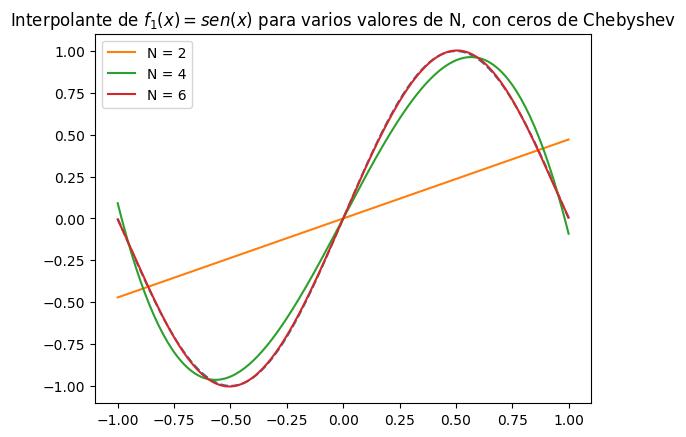

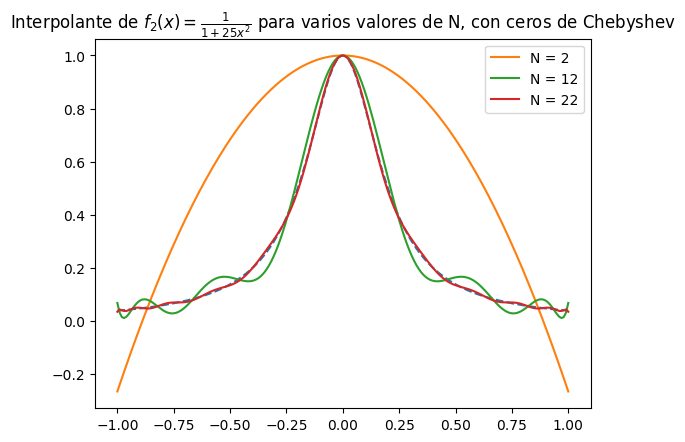

In [96]:
plt.figure()
plt.title('Interpolante de $f_{1}(x) = sen(x) $ para varios valores de N, con ceros de Chebyshev')
x,y=coords(f1)
plt.plot(x,y,'--')
legend=[]
for i in range(3):
    N=2+2*i
    legend.append(0)
    x0=CG(N)
    x,y=coordsIn(f1,x0)
    legend[i],=plt.plot(x,y,label='N = '+str(N))
plt.legend(handles=legend)
plt.show()

plt.figure()
plt.title(r'Interpolante de $f_{2}(x) = \frac{1}{1+25x^2}$ '+'para varios valores de N, con ceros de Chebyshev')
x,y=coords(f2)
plt.plot(x,y,'--')
legend=[]
for i in range(3):
    N=2+10*i
    legend.append(0)
    x0=CG(N)
    x,y=coordsIn(f2,x0)
    legend[i],=plt.plot(x,y,label='N = '+str(N))
plt.legend(handles=legend)
plt.show()

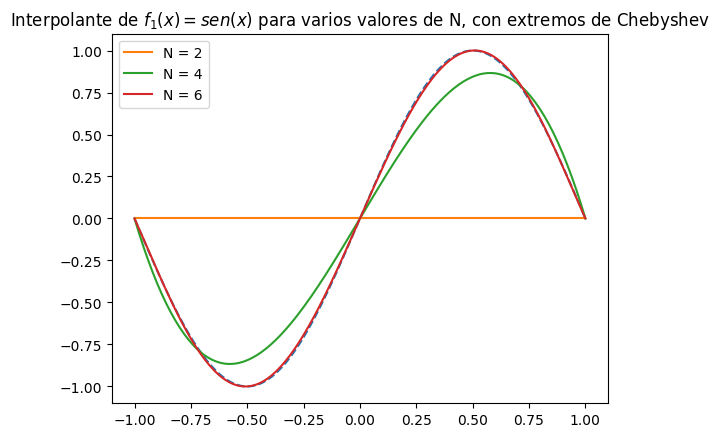

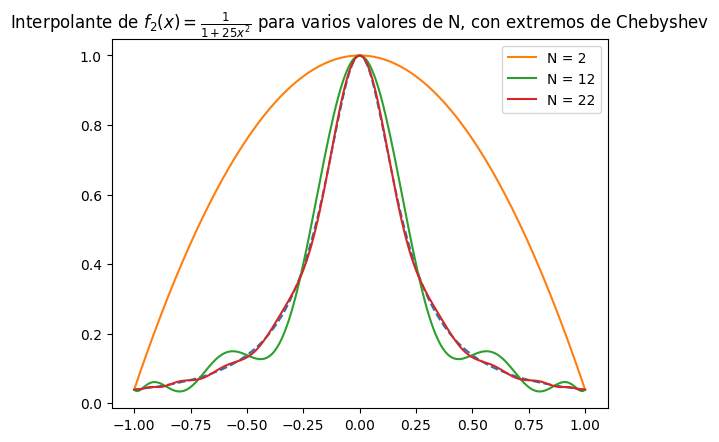

In [98]:
plt.figure()
plt.title('Interpolante de $f_{1}(x) = sen(x) $ para varios valores de N, con extremos de Chebyshev')
x,y=coords(f1)
plt.plot(x,y,'--')
legend=[]
for i in range(3):
    N=2+2*i
    legend.append(0)
    x0=CGL(N)
    x,y=coordsIn(f1,x0)
    legend[i],=plt.plot(x,y,label='N = '+str(N))
plt.legend(handles=legend)
plt.show()

plt.figure()
plt.title(r'Interpolante de $f_{2}(x) = \frac{1}{1+25x^2}$ '+'para varios valores de N, con extremos de Chebyshev')
x,y=coords(f2)
plt.plot(x,y,'--')
legend=[]
for i in range(3):
    N=2+10*i
    legend.append(0)
    x0=CGL(N)
    x,y=coordsIn(f2,x0)
    legend[i],=plt.plot(x,y,label='N = '+str(N))
plt.legend(handles=legend)
plt.show()

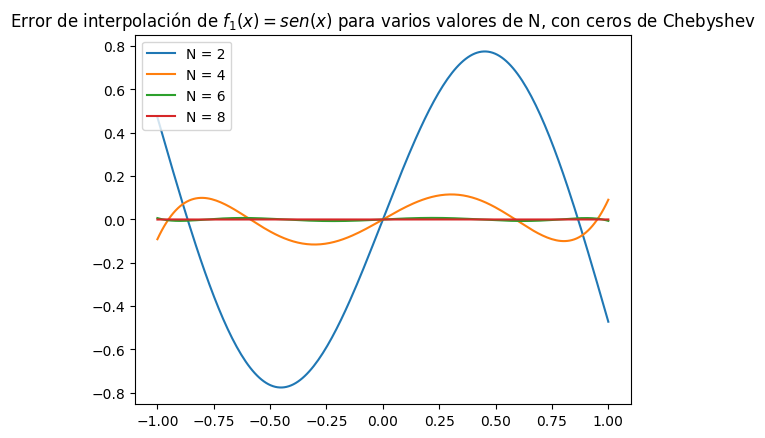

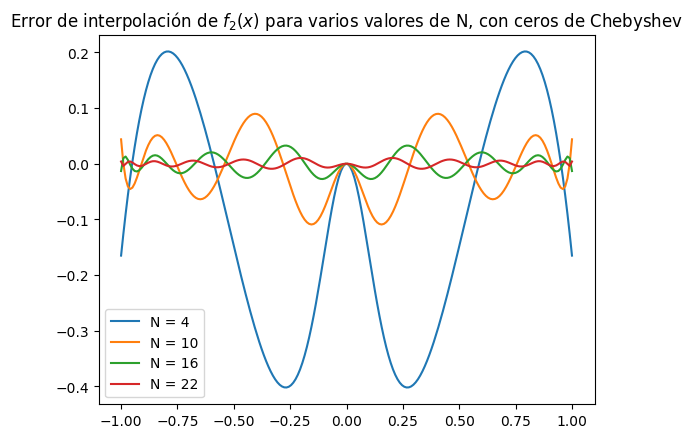

In [99]:
def coordsE(f,x0,a=-1,b=1,n=200):
    x=np.linspace(a,b,n)
    y=[]
    for i in range(n):
        yi=f(x[i])-I(f,x0,x[i])
        y.append(yi)
    return x,y


plt.figure()
plt.title('Error de interpolación de $f_{1}(x) = sen(x) $ para varios valores de N, con ceros de Chebyshev')
legend=[]
for i in range(4):
    N=2+2*i
    legend.append(0)
    x0=CG(N)
    x,y = coordsE(f1,x0)
    legend[i],=plt.plot(x,y,label='N = '+str(N))
plt.legend(handles=legend)
plt.show()

plt.figure()
plt.title('Error de interpolación de $f_{2}(x)$ para varios valores de N, con ceros de Chebyshev')
legend=[]
for i in range(4):
    N=4+6*i
    legend.append(0)
    x0=CG(N)
    x,y = coordsE(f2,x0)
    legend[i],=plt.plot(x,y,label='N = '+str(N))
plt.legend(handles=legend)
plt.show()

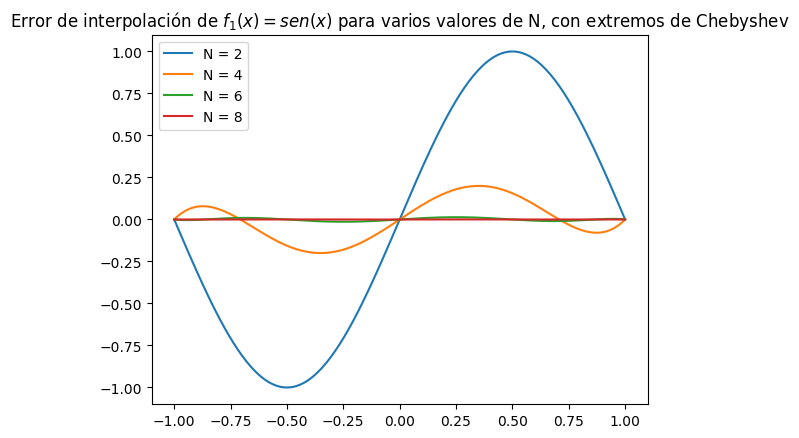

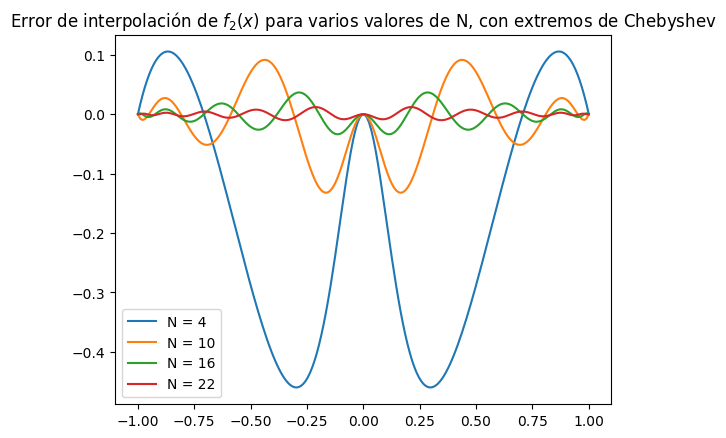

In [101]:
plt.figure()
plt.title('Error de interpolación de $f_{1}(x) = sen(x) $ para varios valores de N, con extremos de Chebyshev')
legend=[]
for i in range(4):
    N=2+2*i
    legend.append(0)
    x0=CGL(N)
    x,y = coordsE(f1,x0)
    legend[i],=plt.plot(x,y,label='N = '+str(N))
plt.legend(handles=legend)
plt.show()

plt.figure()
plt.title('Error de interpolación de $f_{2}(x)$ para varios valores de N, con extremos de Chebyshev')
legend=[]
for i in range(4):
    N=4+6*i
    legend.append(0)
    x0=CGL(N)
    x,y = coordsE(f2,x0)
    legend[i],=plt.plot(x,y,label='N = '+str(N))
plt.legend(handles=legend)
plt.show()